In [4]:
#import stuff to make some fake data to play with.
import numpy as np

In [34]:
#these imports enable us to change things like where plots appear
#what is used in the legends etc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['legend.numpoints'] = 1

In [38]:
#make some fake data. Lets generate 100 x points from a uniform distribution
#and 100 y points from a Gaussian distribution
#parameters for the uniform distribution
x_min = 0
x_max = 10

#parameters for the gaussian distribution
y_mean = 0
y_sd = 1

x_data = np.random.uniform(x_min, x_max, size=500)
y_data = np.random.normal(y_mean, y_sd, size=500)

#let's also create a second data set:

x_data_2 = np.random.uniform(x_min+1, x_max-2, size=500)
y_data_2 = np.random.normal(y_mean, y_sd-0.5, size=500)

y_min = min(y_data)
y_max = max(y_data)

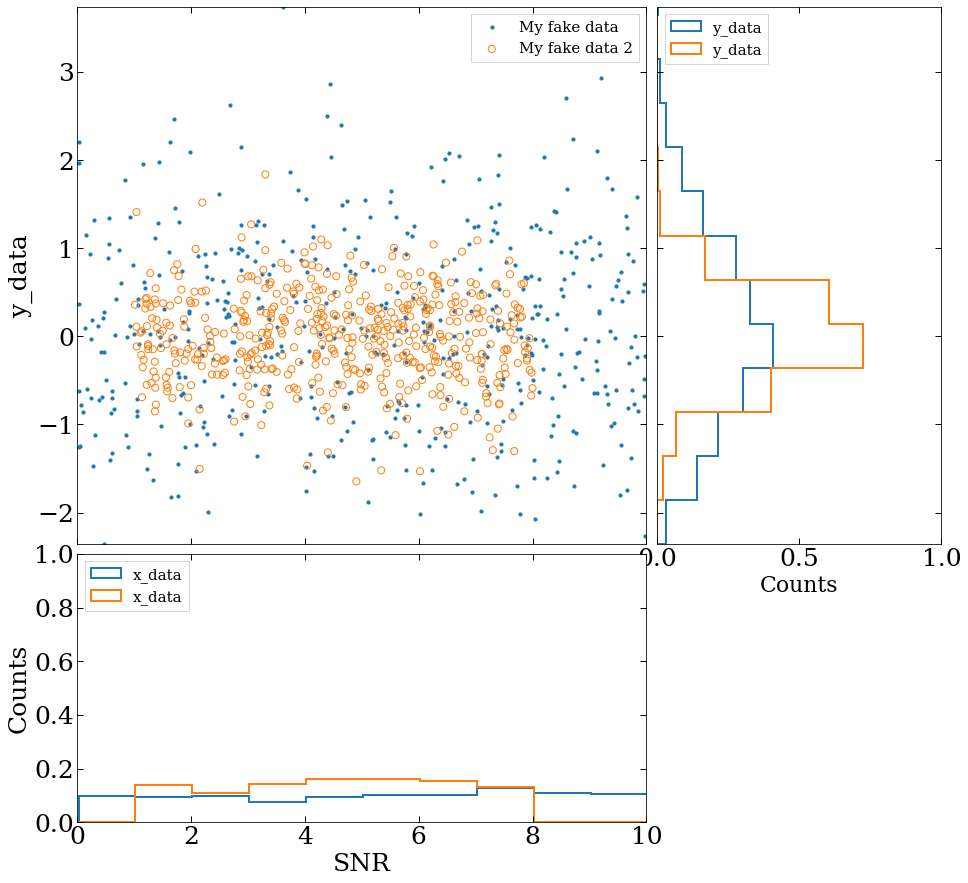

In [39]:
#some setup for your histograms. 
xbinwidth = 1
ybinwidth = 0.5

xbins = np.arange(min(x_data), max(x_data) + xbinwidth, xbinwidth)
ybins = np.arange(min(y_data), max(y_data) + ybinwidth, ybinwidth)


#create the figure with the given size
f = plt.figure(figsize = (15,15))
#turn the figure into a grid with 4 sections, but we will only use 3
#give the width and height ratios. 
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[2, 1],
                       height_ratios=[2, 1]
                       )
#spacing between the adjacent subplots in the grid
gs.update(wspace=0.025, hspace=0.025)

#the main scatter plot:
ax1 = plt.subplot(gs[0])
#scatter plot of first data set
ax1.scatter(x_data, y_data, s= 10,
            c = 'tab:blue', label = 'My fake data')

#second data set but with a different marker style: open circles
ax1.scatter(x_data_2, y_data_2, s= 50,facecolor = 'none',
           edgecolor = 'tab:orange', label = 'My fake data 2')
#set up axes:
ax1.set_xlim([x_min,x_max])
ax1.set_ylim([y_min, y_max])
ax1.set_yscale('linear')
ax1.set_ylabel('y_data')
#no x-label as it will go onto the lower histogram in a second
#make a legend
ax1.legend(loc = 'upper right', scatterpoints=1 ,prop={'size': 15}, frameon = True)
#remove the tick labels on the x-axis, x-tick labels will be on the lower histogram
ax1.xaxis.set_ticklabels([])

# the histogram of the quantity on the vertical axis, I normalized the histogram, 
#if you don't normalize just change the x-lims to ensure the number of counts can be
#seen
ax2 = plt.subplot(gs[1])
ax2.hist(y_data, bins=ybins, color = 'tab:blue', histtype = 'step', lw = 2,
         orientation= 'horizontal', label = 'y_data', normed = True)
ax2.hist(y_data_2, bins=ybins, color = 'tab:orange', histtype = 'step', lw = 2,
         orientation= 'horizontal', label = 'y_data', normed = True)
ax2.set_xlabel('Counts', fontsize=22)
#make sure the y-lim is the same as above
ax2.set_ylim([y_min, y_max])
ax2.set_xlim([0, 1])
ax2.set_yscale('linear')
ax2.yaxis.set_ticklabels([])
ax2.legend(loc = 'upper left',prop={'size': 15})


# the histogram of the quantity on the vertical axis
ax3 = plt.subplot(gs[2])
ax3.hist(x_data, bins=xbins, color = 'tab:blue', histtype = 'step', lw = 2,
        label = 'x_data', normed = True)
ax3.hist(x_data_2, bins=xbins, color = 'tab:orange', histtype = 'step', lw = 2,
        label = 'x_data', normed = True)
ax3.set_xlim([x_min, x_max])
ax3.set_ylim([0, 1])
ax3.set_ylabel('Counts')
ax3.set_xlabel('SNR')
ax3.legend(loc = 'upper left',prop={'size': 15})
plt.savefig('example_2hist.png')
plt.show()